# Application of Clustering Model

### Importing Important libraries

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.cluster import KMeans
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
from sklearn import decomposition
from sklearn import datasets
import seaborn as sns
from sklearn.decomposition import PCA

### importing data

In [31]:
df=pd.read_csv('C:/Users/Aman Raj/data_stocks.csv')

df.head(5)

,DATE,SP500,NASDAQ.AAL,NASDAQ.AAPL,NASDAQ.ADBE,NASDAQ.ADI,NASDAQ.ADP,NASDAQ.ADSK,NASDAQ.AKAM,NASDAQ.ALXN,...,NYSE.WYN,NYSE.XEC,NYSE.XEL,NYSE.XL,NYSE.XOM,NYSE.XRX,NYSE.XYL,NYSE.YUM,NYSE.ZBH,NYSE.ZTS
0,1491226200,2363.6101,42.3300,143.6800,129.6300,82.040,102.2300,85.2200,59.760,121.52,...,84.370,119.035,44.40,39.88,82.03,7.36,50.22,63.86,122.000,53.350
1,1491226260,2364.1001,42.3600,143.7000,130.3200,82.080,102.1400,85.6500,59.840,121.48,...,84.370,119.035,44.11,39.88,82.03,7.38,50.22,63.74,121.770,53.350
2,1491226320,2362.6799,42.3100,143.6901,130.2250,82.030,102.2125,85.5100,59.795,121.93,...,84.585,119.260,44.09,39.98,82.02,7.36,50.12,63.75,121.700,53.365
3,1491226380,2364.3101,42.3700,143.6400,130.0729,82.000,102.1400,85.4872,59.620,121.44,...,84.460,119.260,44.25,39.99,82.02,7.35,50.16,63.88,121.700,53.380
4,1491226440,2364.8501,42.5378,143.6600,129.8800,82.035,102.0600,85.7001,59.620,121.60,...,84.470,119.610,44.11,39.96,82.03,7.36,50.20,63.91,121.695,53.240


In [32]:
df=data.dropna()
df1=df.copy()

In [33]:
df.shape

(41266, 502)

### standardising the data

In [29]:
from sklearn.preprocessing import StandardScaler

In [34]:
features=df.values          #converting dataframe into numpy values
sc=StandardScaler()

In [36]:
x_scaled=sc.fit_transform(features)
print(x_scaled.shape)

(41266, 502)


### Now using PCA we reduce the dimensionality of the data to get the accurate visualisation|

Text(0, 0.5, 'cumulative explained variance')

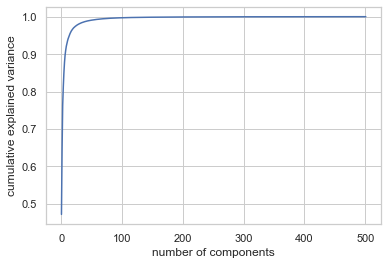

In [37]:
sns.set()
sns.set_style('whitegrid')
pca=PCA().fit(x_scaled)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

### 1.As the graph shows us that we need about 100 components to retain 100% of variance
### 2.Applying PCA to reduce the number of dimensions from 502 to 2.


In [58]:
pca=PCA(n_components=2)
pca.fit(x_scaled)
print('explained variance:')
print(pca.explained_variance_)
x_transformed=pca.transform(x_scaled)
print('Transformed feature values first five rows:')
print(x_transformed[:5,:])
x_transformed.shape

explained variance:
[237.01475857  86.20695296]
Transformed feature values first five rows:
[[25.64715405  9.99154156]
 [25.74447983  9.87809253]
 [25.66169481  9.81134664]
 [25.76412613  9.97993834]
 [25.67551977  9.86346559]]


(41266, 2)

# Problem 1

### There are various stocks for which we have collected data set,which all stocks are apparently similar in performance?
### Finding optimum number of method using Elbow method

In [40]:
from sklearn.metrics import silhouette_score


In [70]:
wcss=[]

In [71]:
for i in range(1,21):
    kmeans=KMeans(i)
    kmeans.fit(x_transformed)
    wcss.append(kmeans.inertia_)

Text(0, 0.5, 'Mean squarred errors')

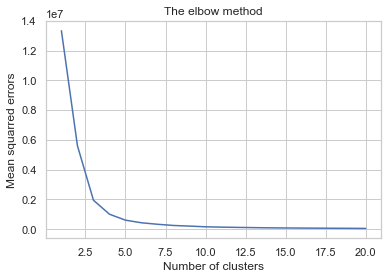

In [72]:
plt.plot(range(1,21),wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Mean squarred errors')

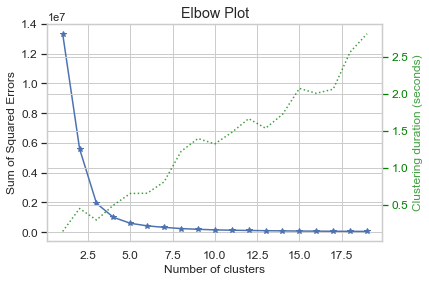

In [76]:
import scikitplot
scikitplot.cluster.plot_elbow_curve(KMeans(),x_transformed,cluster_ranges=range(1,20))

### We have got the optimal number of clusters as 5
### Applying the kmeans algorithm

In [96]:
kmeans=KMeans(5)
kmeans.fit(x_transformed)
ymeans=kmeans.fit_predict(x_transformed)
labels=kmeans.labels_
print('labels generated:\n',labels)


labels generated:
 [0 0 0 ... 4 4 4]


In [83]:
len(labels)

41266

## Visualising the clusters

<function matplotlib.pyplot.show(*args, **kw)>

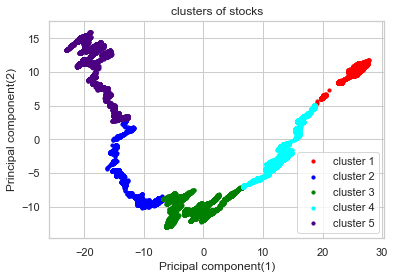

In [101]:
plt.scatter(x_transformed[ymeans==0,0],x_transformed[ymeans==0,1],s=10,c='red',label='cluster 1')
plt.scatter(x_transformed[ymeans==1,0],x_transformed[ymeans==1,1],s=10,c='blue',label='cluster 2')
plt.scatter(x_transformed[ymeans==2,0],x_transformed[ymeans==2,1],s=10,c='green',label='cluster 3')
plt.scatter(x_transformed[ymeans==3,0],x_transformed[ymeans==3,1],s=10,c='cyan',label='cluster 4')
plt.scatter(x_transformed[ymeans==4,0],x_transformed[ymeans==4,1],s=10,c='indigo',label='cluster 5')
plt.title('clusters of stocks')
plt.xlabel('Pricipal component(1)')
plt.ylabel('Principal component(2)')
plt.legend()
plt.show

### The above five clusters shows us the stocks which are similar in stock performance

## Problem 2. How many unique patterns exists in the historical data?

In [103]:
df_comp=pd.DataFrame(pca.components_,columns=df1.columns)
df_comp.head()

,DATE,SP500,NASDAQ.AAL,NASDAQ.AAPL,NASDAQ.ADBE,NASDAQ.ADI,NASDAQ.ADP,NASDAQ.ADSK,NASDAQ.AKAM,NASDAQ.ALXN,...,NYSE.WYN,NYSE.XEC,NYSE.XEL,NYSE.XL,NYSE.XOM,NYSE.XRX,NYSE.XYL,NYSE.YUM,NYSE.ZBH,NYSE.ZTS
0,-0.064116,-0.061006,-0.039128,-0.040896,-0.062662,-0.009756,-0.035746,-0.054455,0.050145,-0.035261,...,-0.049236,0.056778,-0.054394,-0.050423,0.046987,-0.057669,-0.061151,-0.062229,0.002498,-0.051497
1,0.013460,-0.017836,-0.064281,0.033885,0.001886,-0.032434,0.043464,-0.029479,0.016120,0.058259,...,-0.058924,0.030252,0.013685,-0.040764,-0.052832,0.010248,0.031474,-0.020367,-0.081247,-0.059452


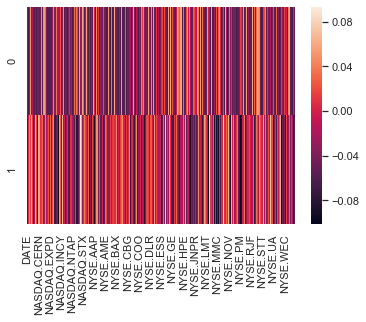

In [104]:
sns.set_style('whitegrid')
sns.heatmap(df_comp)

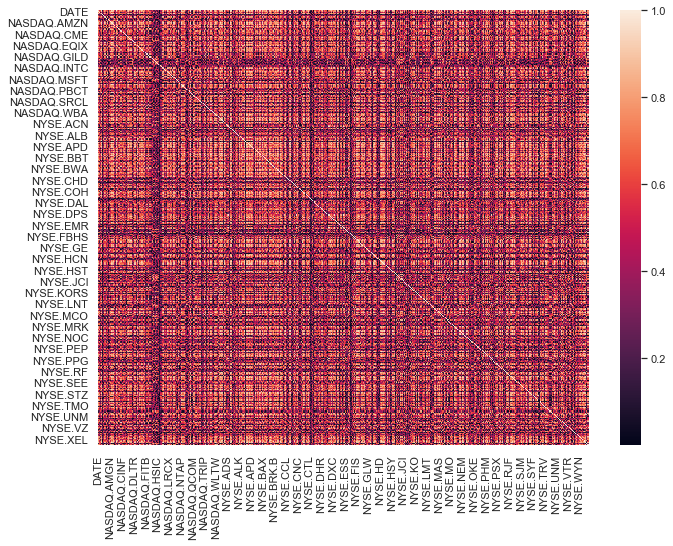

In [105]:
plt.figure(figsize=(11,8))
df_corr=df1.corr().abs()
sns.heatmap(df_corr)

### Heatmap shows us the unique pattern that exists in the data